## LINEARREG指标介绍
LINEARREG（Linear Regression）指标是技术分析中常用的指标之一，用于计算一段时间内价格的线性回归拟合线。线性回归是一种统计方法，用于确定两个变量之间的线性关系。通过线性回归，可以得到一条最佳拟合直线，该直线可以用来预测未来价格趋势。

## 交易信号的使用方式
LINEARREG指标可以用于多种交易策略，以下是一些常见的使用方式：

### 趋势判断：

上升趋势：当价格位于线性回归拟合线之上且斜率为正，表明市场处于上升趋势。
下降趋势：当价格位于线性回归拟合线之下且斜率为负，表明市场处于下降趋势。

### 回归交易：

当价格偏离线性回归拟合线时，可以采取逆向交易策略。例如，当价格远高于拟合线时，可能是超买信号，可以考虑卖出；当价格远低于拟合线时，可能是超卖信号，可以考虑买入。

### 突破交易：

结合其他技术指标，当价格突破线性回归拟合线时，可以作为买入或卖出的信号。例如，当价格突破拟合线上方，可以作为买入信号；当价格突破拟合线下方，可以作为卖出信号。

In [1]:
import pandas as pd
import akshare as ak
import talib

stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol="300750", period="daily", start_date="19900101", end_date='21000101', adjust="qfq")
fund_etf_hist_em_df = ak.fund_etf_hist_em(symbol="159915", period="daily", start_date="20000101", end_date="21000101", adjust="qfq")

stock_zh_a_hist_df_s=stock_zh_a_hist_df[stock_zh_a_hist_df["日期"]>pd.to_datetime("2020-01-01")]
fund_etf_hist_em_df_s = fund_etf_hist_em_df[pd.to_datetime(fund_etf_hist_em_df["日期"])>pd.to_datetime("2020-01-01")]

fund_etf_hist_em_df_s["日期"] = pd.to_datetime(fund_etf_hist_em_df_s["日期"])
stock_zh_a_hist_df_s["日期"] = pd.to_datetime(stock_zh_a_hist_df_s["日期"])
merge_stock_zh_df = pd.merge(stock_zh_a_hist_df_s[["日期", "涨跌幅"]], fund_etf_hist_em_df_s[["日期", "涨跌幅"]], how="inner", on="日期")

# 填充缺失值为上一条记录的涨跌幅
merge_stock_zh_df["涨跌幅_x"].fillna(method="ffill", inplace=True)
merge_stock_zh_df["涨跌幅_y"].fillna(method="ffill", inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3399917921.py:8: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  stock_zh_a_hist_df_s=stock_zh_a_hist_df[stock_zh_a_hist_df["日期"]>pd.to_datetime("2020-01-01")]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3399917921.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_etf_hist_em_df_s["日期"] = pd.to_datetime(fund_etf_hist_em_df_s["日期"])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18060\3399917921.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [7]:
merge_stock_zh_df

,日期,涨跌幅_x,涨跌幅_y
0,2020-01-02,1.21,2.02
1,2020-01-03,2.13,-0.06
2,2020-01-06,-0.46,1.36
3,2020-01-07,-0.62,1.90
4,2020-01-08,1.15,-1.65
...,...,...,...
1091,2024-07-08,-0.96,-1.66
1092,2024-07-09,-0.08,1.50
1093,2024-07-10,-1.55,-0.12
1094,2024-07-11,2.29,2.22


In [9]:
index = talib.LINEARREG(fund_etf_hist_em_df_s["收盘"], timeperiod=5)
index

1961       NaN
1962       NaN
1963       NaN
1964       NaN
1965    1.8086
         ...  
3052    1.6034
3053    1.6092
3054    1.6148
3055    1.6390
3056    1.6578
Length: 1096, dtype: float64

In [15]:
# 线性回归的角度 
angle = talib.LINEARREG_ANGLE(fund_etf_hist_em_df_s["收盘"], timeperiod=5)
angle

1961         NaN
1962         NaN
1963         NaN
1964         NaN
1965    0.641686
          ...   
3052   -0.458356
3053   -0.217723
3054    0.005730
3055    0.481273
3056    0.847916
Length: 1096, dtype: float64

In [16]:
# 线性回归截距  
intercept = talib.LINEARREG_INTERCEPT(fund_etf_hist_em_df_s["收盘"], timeperiod=5)
# 线性回归斜率指标
slope = talib.LINEARREG_SLOPE(fund_etf_hist_em_df_s["收盘"], timeperiod=5)

In [17]:
beta_df = pd.DataFrame(index)
beta_df["日期"]=fund_etf_hist_em_df_s["日期"]
beta_df["收盘"]=fund_etf_hist_em_df_s["收盘"]
beta_df["angle"]=angle
beta_df["intercept"]=intercept
beta_df["slope"]=slope
# merge_stock_zh_df_1 = pd.merge(merge_stock_zh_df, beta_df, how="inner")
beta_df

,0,日期,收盘,angle,intercept,slope
1961,NaN,2020-01-02,1.765,NaN,NaN,NaN
1962,NaN,2020-01-03,1.764,NaN,NaN,NaN
1963,NaN,2020-01-06,1.788,NaN,NaN,NaN
1964,NaN,2020-01-07,1.822,NaN,NaN,NaN
1965,1.8086,2020-01-08,1.792,0.641686,1.7638,0.0112
...,...,...,...,...,...,...
3052,1.6034,2024-07-08,1.596,-0.458356,1.6354,-0.0080
3053,1.6092,2024-07-09,1.620,-0.217723,1.6244,-0.0038
3054,1.6148,2024-07-10,1.618,0.005730,1.6144,0.0001
3055,1.6390,2024-07-11,1.654,0.481273,1.6054,0.0084


[*********************100%***********************]  1 of 1 completed


C:\python_env\python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\python_env\python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\python_env\python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\python_env\python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21450 (\N{CJK UNIFIED IDEOGRAPH-53CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\python_env\python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20854 (\N{CJK UNIFIED IDEOGRAPH-5176}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

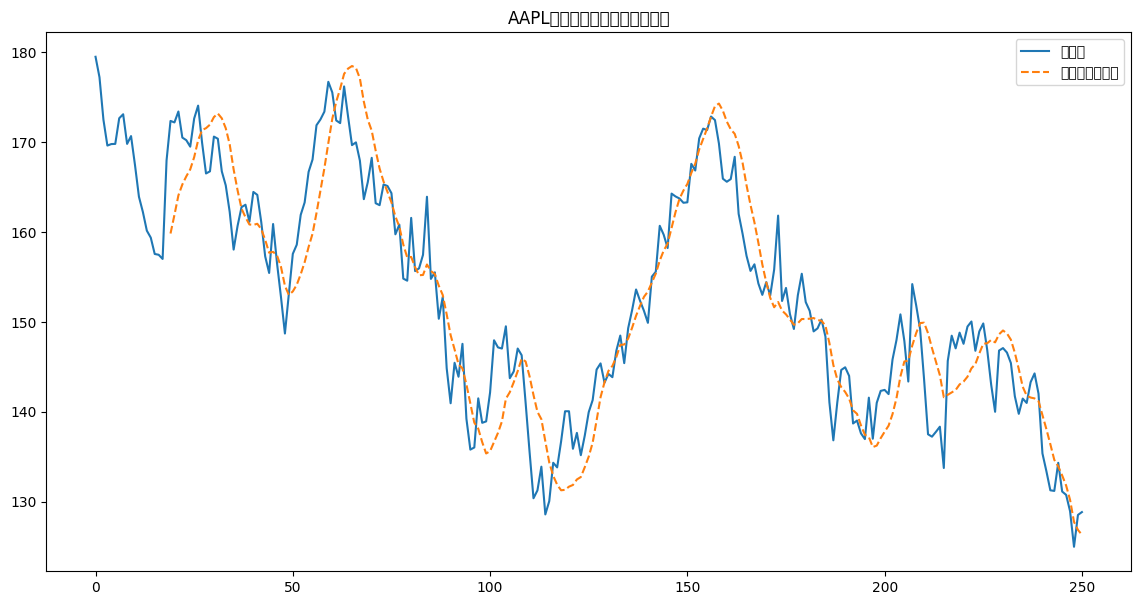

In [14]:
import yfinance as yf
import talib
import numpy as np
import matplotlib.pyplot as plt

# 下载历史价格数据
stock = yf.download("AAPL", start="2022-01-01", end="2023-01-01")

# 获取收盘价
price_series = stock['Adj Close'].values

# 计算线性回归拟合值
time_period = 20  # 使用20天的窗口
linear_reg = talib.LINEARREG(price_series, time_period)

# 绘制收盘价和线性回归拟合值
plt.figure(figsize=(14, 7))
plt.plot(price_series, label='收盘价')
plt.plot(linear_reg, label='线性回归拟合值', linestyle='--')
plt.legend()
plt.title('AAPL收盘价及其线性回归拟合值')
plt.show()
